<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


 -データセット内のキー変数の分布を分析します。

 -統計的方法を使用して外れ値を特定して削除します。

 -関連する統計および相関分析を実行します。

#### Install and import the required libraries


In [6]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [7]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


回答者がさまざまな業界にどのように配布されるかを探ります。

 -バーチャートをプロットして、業界ごとに回答者の分布を視覚化します。

 -顕著な傾向を強調します。


In [14]:
for i in df.columns:
    print(i)

ResponseId
MainBranch
Age
Employment
RemoteWork
Check
CodingActivities
EdLevel
LearnCode
LearnCodeOnline
TechDoc
YearsCode
YearsCodePro
DevType
OrgSize
PurchaseInfluence
BuyNewTool
BuildvsBuy
TechEndorse
Country
Currency
CompTotal
LanguageHaveWorkedWith
LanguageWantToWorkWith
LanguageAdmired
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
DatabaseAdmired
PlatformHaveWorkedWith
PlatformWantToWorkWith
PlatformAdmired
WebframeHaveWorkedWith
WebframeWantToWorkWith
WebframeAdmired
EmbeddedHaveWorkedWith
EmbeddedWantToWorkWith
EmbeddedAdmired
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
MiscTechAdmired
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
ToolsTechAdmired
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
NEWCollabToolsAdmired
OpSysPersonal use
OpSysProfessional use
OfficeStackAsyncHaveWorkedWith
OfficeStackAsyncWantToWorkWith
OfficeStackAsyncAdmired
OfficeStackSyncHaveWorkedWith
OfficeStackSyncWantToWorkWith
OfficeStackSyncAdmired
AISearchDevHaveWorkedWith
AISearchDevWantTo

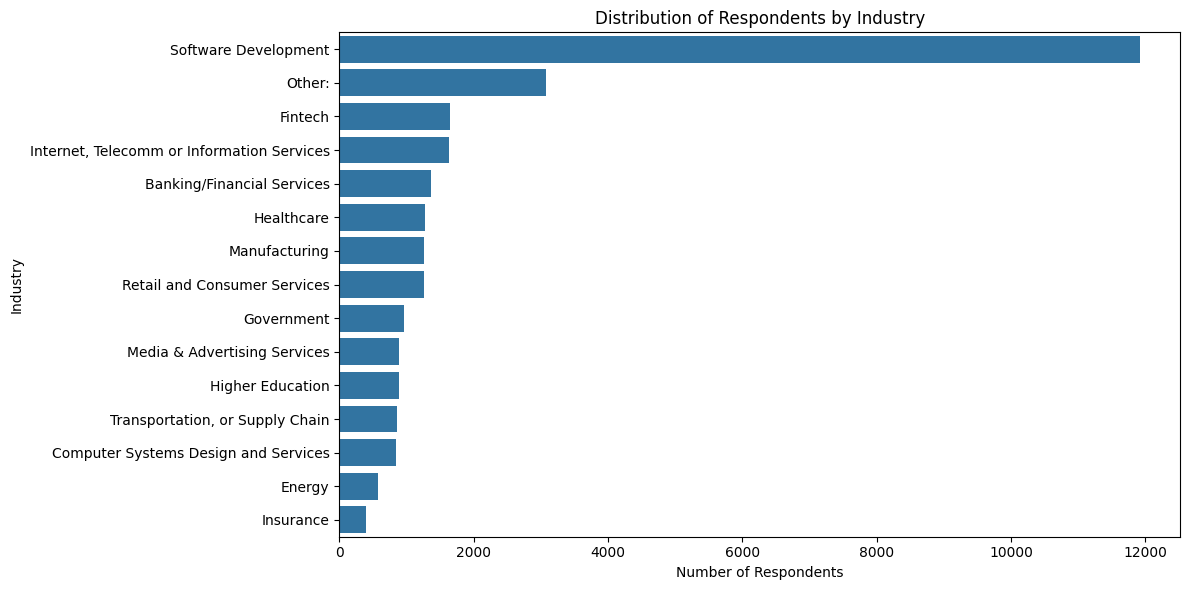

In [15]:
##Write your code here

plt.figure(figsize=(12, 6))
industry_counts = df['Industry'].value_counts()
sns.barplot(x=industry_counts.values, y=industry_counts.index)
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


年間報酬が非常に高い回答者を特定します。

 -「Converted Creccearly」の基本統計（平均、中央値、および標準偏差）を計算します。

 -定義されたしきい値を超える補正値を特定します（たとえば、平均を上回る3標準偏差）。

In [16]:
##Write your code here

comp_stats = df['ConvertedCompYearly'].describe()
print("Compensation Statistics:")
print(comp_stats)

mean_comp = df['ConvertedCompYearly'].mean()
std_comp = df['ConvertedCompYearly'].std()
threshold = mean_comp + (3 * std_comp)

high_outliers = df[df['ConvertedCompYearly'] > threshold]
print(f"\nNumber of high compensation outliers: {len(high_outliers)}")
print("\nHigh compensation outliers:")
print(high_outliers[['Industry', 'ConvertedCompYearly']].sort_values('ConvertedCompYearly', ascending=False))


Compensation Statistics:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

Number of high compensation outliers: 89

High compensation outliers:
                                   Industry  ConvertedCompYearly
15837                                   NaN           16256603.0
12723          Media & Advertising Services           13818022.0
28379  Computer Systems Design and Services            9000000.0
17593                  Software Development            6340564.0
17672                  Software Development            4936778.0
...                                     ...                  ...
13336            Banking/Financial Services             660660.0
28381                               Fintech             650000.0
28213          Retail and Consumer Services             650000.0
6735                                

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


IQRメソッドを使用して、「Converted Creccearly」列の外れ値を識別します。

 -四分位範囲（IQR）を計算します。

 -外れ値の上限と下限を決定します。

 -ボックスプロットを使用して外れ値を数えて視覚化します。

Number of outliers using IQR method: 978


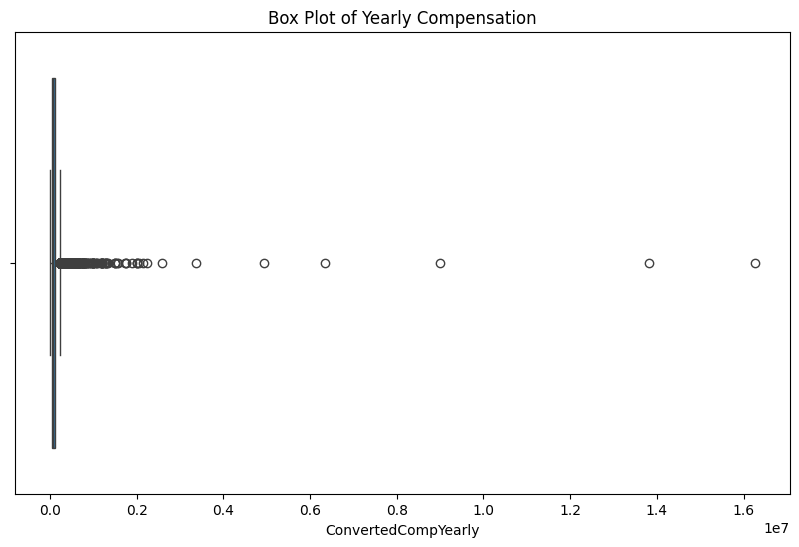

In [17]:
##Write your code here

Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(f"Number of outliers using IQR method: {len(outliers)}")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Box Plot of Yearly Compensation')
plt.xlabel('ConvertedCompYearly')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


データセットから外れ値を削除します。

 -「Converted Creccearly」に外れ値を持つ行を除く新しいデータフレームを作成します。
 -新しいデータフレームのサイズを検証します。

In [18]:
##Write your code here

df_clean = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_clean)}")
print(f"Number of removed outliers: {len(df) - len(df_clean)}")


Original dataset size: 65437
Cleaned dataset size: 22457
Number of removed outliers: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


「年齢」（変換）と他の数値列の間の相関を分析します。

 -「age」列をマップして、数値を近似します。

 -「年齢」と他の数値変数との相関を計算します。

 -相関マトリックスを視覚化します。


/var/folders/np/lj2crsq11vl__dd5tfxv027m0000gn/T/ipykernel_4510/330391938.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age_numeric'] = df_clean['Age'].map(age_mapping)


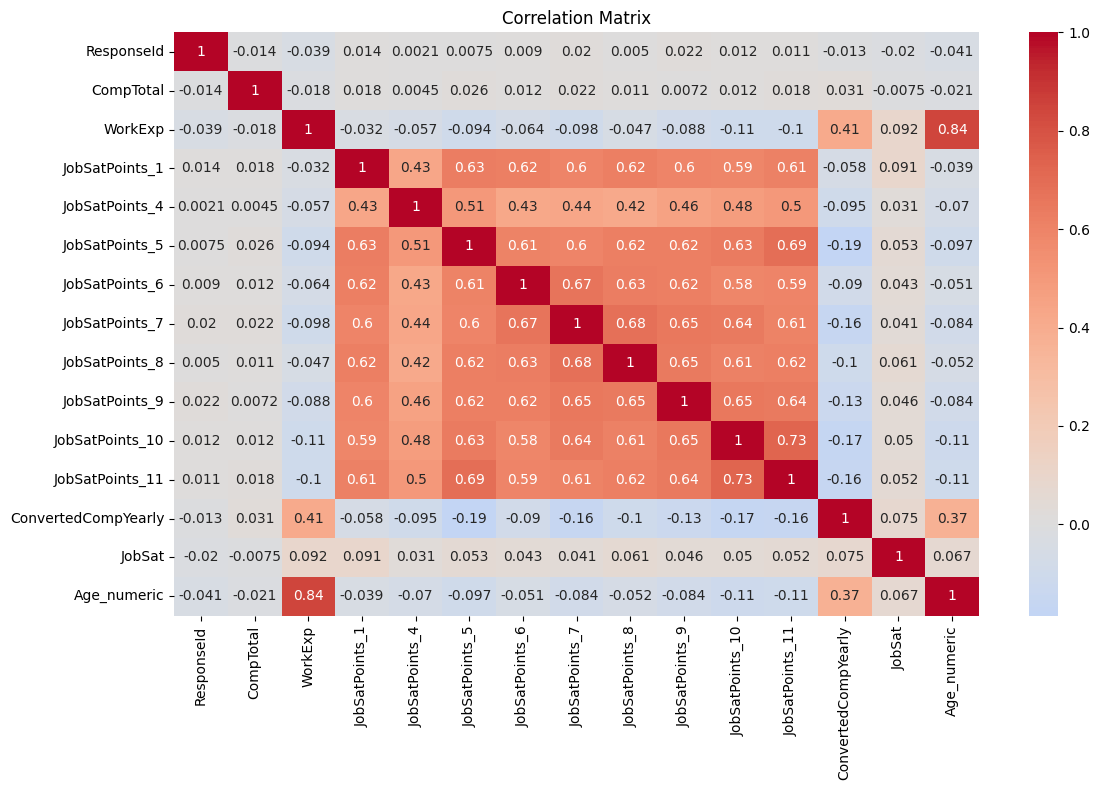


Correlation with Age:
Age_numeric            1.000000
WorkExp                0.843082
ConvertedCompYearly    0.371523
JobSat                 0.067131
CompTotal             -0.021420
JobSatPoints_1        -0.038829
ResponseId            -0.040832
JobSatPoints_6        -0.051284
JobSatPoints_8        -0.051569
JobSatPoints_4        -0.069965
JobSatPoints_9        -0.083957
JobSatPoints_7        -0.084062
JobSatPoints_5        -0.096788
JobSatPoints_11       -0.106719
JobSatPoints_10       -0.111901
Name: Age_numeric, dtype: float64


In [19]:
##Write your code here

age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df_clean['Age_numeric'] = df_clean['Age'].map(age_mapping)

numeric_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_clean[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("\nCorrelation with Age:")
print(correlation_matrix['Age_numeric'].sort_values(ascending=False))

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
